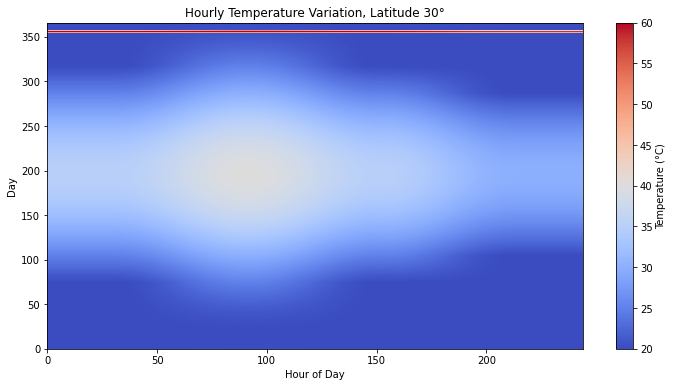

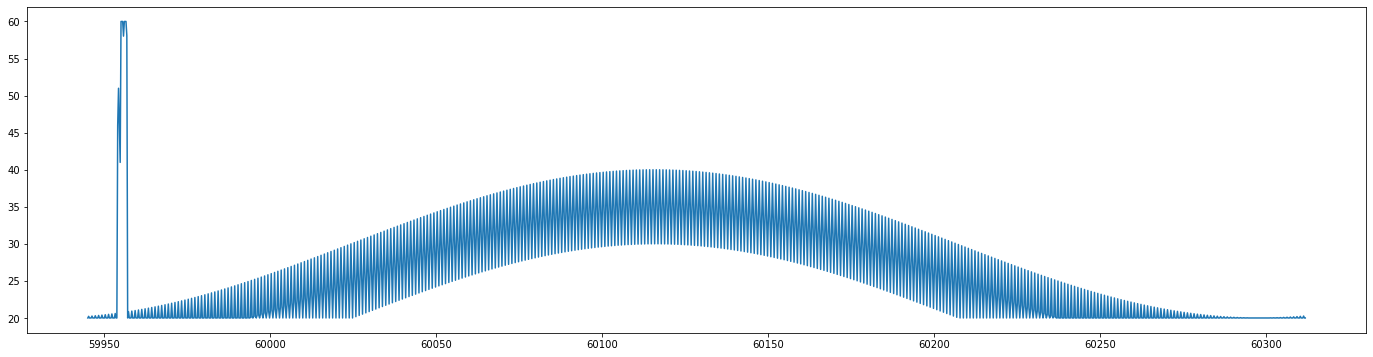

In [20]:
from temp import ForestFireTemperatureSimulator
import numpy as np
import matplotlib.pyplot as plt
# Example of using the advanced simulator with a forest fire
latitude = 30  # Specify the latitude of the point on Earth
target_average_temperature = 25  # Specify the target average temperature
min_temperature = 20  # Specify the minimum temperature
max_temperature = 60  # Specify the maximum temperature
oscillation_factor = 5  # Specify the oscillation factor
outlier_probability = 0  # Specify the probability of having an outlier
outlier_magnitude = 0  # Specify the magnitude of the outliers
fire_start_day = 10  # Specify the day when the forest fire starts (during summer)
fire_duration_days = 3  # Specify the duration of the forest fire
fire_magnitude = 50  # Specify the magnitude of the temperature spike during the fire
fire_smoothness = 3  # Specify the smoothness of the fire spike

forest_fire_simulator = ForestFireTemperatureSimulator(
    latitude, target_average_temperature, min_temperature, max_temperature,
    oscillation_factor, outlier_probability, outlier_magnitude,
    fire_start_day, fire_duration_days, fire_magnitude, fire_smoothness
)

# Simulate temperature for 265 days
num_days_to_simulate = 366
output = forest_fire_simulator.simulate_temperature_for_days(num_days_to_simulate)
# Plotting
temps_vs_hours_of_doy = output['temps_vs_hours_of_doy']

fig, ax = plt.subplots(figsize=(12, 6))
cax = ax.imshow(temps_vs_hours_of_doy, cmap='coolwarm', aspect='auto', extent=[0, 244, 0, num_days_to_simulate])
ax.set_title(f'Hourly Temperature Variation, Latitude {latitude}°')
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Day')
cbar = fig.colorbar(cax, label='Temperature (°C)')
plt.show()
# Plotting
temps,mjds = output['temperature_time_series'].items()
outliers = output['outliers']
nmjds = np.array(mjds[1])[outliers]
ntmps = np.array(temps[1])[outliers]
# plt.plot(mjds[1],temps[1])
fig, ax = plt.subplots(figsize=(24, 6))
cax = ax.plot(mjds[1],temps[1])
ax.scatter(nmjds,ntmps,color='r')
# ax.set_title(f'Hourly Temperature Variation, Latitude {latitude}°')
# ax.set_xlabel('Hour of Day')
# ax.set_ylabel('Day')
# cbar = fig.colorbar(cax, label='Temperature (°C)')
plt.show()

In [21]:
from numpy import dot
def kf_predict(X, P, A, Q, B, U):
 X = dot(A, X) + dot(B, U)
 P = dot(A, dot(P, A.T)) + Q
 return(X,P) 

In [33]:
from numpy import *
from numpy.linalg import inv ,det

In [40]:
def kf_update(X, P, Y, H, R):
 IM = dot(H, X)
 IS = R + dot(H, dot(P, H.T))
 K = dot(P, dot(H.T, inv(IS)))
 X = X + dot(K, (Y-IM))
 P = P - dot(K, dot(IS, K.T))
 LH = gauss_pdf(Y, IM, IS)
 return (X,P,K,IM,IS,LH)
def gauss_pdf(X, M, S):
    if M.shape[1] == 1:
        DX = X - tile(M, X.shape[1])
        E = 0.5 * sum(DX * (dot(inv(S), DX)), axis=0)
        E = E + 0.5 * M.shape[0] * log(2 * pi) + 0.5 * log(det(S))
        P = exp(-E)
    elif X.shape[1] == 1:
        DX = tile(X, M.shape[1])- M
        E = 0.5 * sum(DX * (dot(inv(S), DX)), axis=0)
        E = E + 0.5 * M.shape[0] * log(2 * pi) + 0.5 * log(det(S))
        P = exp(-E)
    else:
        DX = X-M
        E = 0.5 * dot(DX.T, dot(inv(S), DX))
        E = E + 0.5 * M.shape[0] * log(2 * pi) + 0.5 * log(det(S))
        P = exp(-E)
    return (P[0],E[0]) 

In [41]:
#time step of mobile movement
dt = 0.1
# Initialization of state matrices
X = array([[0.0], [0.0], [0.1], [0.1]])
P = diag((0.01, 0.01, 0.01, 0.01))
A = array([[1, 0, dt , 0], [0, 1, 0, dt], [0, 0, 1, 0], [0, 0, 0,\
 1]])
Q = eye(X.shape[0])
B = eye(X.shape[0])
U = zeros((X.shape[0],1)) 

In [42]:
# Measurement matrices
Y = array([[X[0,0] + abs(random.randn(1)[0])], [X[1,0] +abs(random.randn(1)[0])]])
H = array([[1, 0, 0, 0], [0, 1, 0, 0]])
R = eye(Y.shape[0])

In [43]:
# Number of iterations in Kalman Filter
N_iter = 50

In [ ]:
import matplotlib.pyplot as plt

In [44]:
# Applying the Kalman Filter
for i in arange(0, N_iter):
    (X, P) = kf_predict(X, P, A, Q, B, U)
    (X, P, K, IM, IS, LH) = kf_update(X, P, Y, H, R)
    Y = array([[X[0,0] + abs(0.1 * random.randn(1)[0])],[X[1, 0] + abs(0.1 * random.randn(1)[0])]])
    plt.plot()